## Xét bài toán hồi quy tuyến tính

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
"""
y = 4*x_1 - 3*x_2 + 2    
"""
X_train = np.random.rand(1000, 2)
print(X_train.shape)
W = np.array([[4, -3]])
print(W.shape)
y_train = X_train.dot(W.T) + 2 
print(y_train.shape)
print(y_train)

(1000, 2)
(1, 2)
(1000, 1)
[[ 3.53063847e+00]
 [ 2.68915339e+00]
 [ 1.28653862e+00]
 [ 1.52376884e+00]
 [ 3.56379311e-02]
 [ 2.95986134e+00]
 [ 3.26632476e+00]
 [ 5.28633779e+00]
 [ 6.96874448e-01]
 [ 2.30785725e-01]
 [ 7.00847844e-01]
 [ 3.99350574e+00]
 [ 4.20856728e+00]
 [ 3.88403856e+00]
 [ 4.89495086e+00]
 [ 3.29821232e+00]
 [ 2.00895143e+00]
 [ 2.60316327e+00]
 [-3.50978583e-01]
 [ 4.22557617e+00]
 [ 3.20927900e+00]
 [ 1.72441395e+00]
 [ 2.77538359e+00]
 [ 2.02255514e+00]
 [ 6.32005438e-01]
 [ 1.43628973e+00]
 [ 3.05948838e+00]
 [ 3.79196402e+00]
 [ 1.63263421e+00]
 [ 2.76303961e+00]
 [ 1.60196524e+00]
 [ 2.69528344e+00]
 [ 2.98455272e+00]
 [ 2.84788110e+00]
 [ 5.80159117e-01]
 [ 9.15432465e-01]
 [ 2.37735623e+00]
 [ 1.48190061e+00]
 [ 4.17447470e+00]
 [ 3.35649711e+00]
 [ 7.06067532e-01]
 [ 1.62701414e+00]
 [ 3.85320187e+00]
 [ 3.34519813e+00]
 [ 1.27967419e+00]
 [ 3.04600797e+00]
 [-1.39492861e-01]
 [ 2.85031667e+00]
 [ 3.05847461e+00]
 [ 3.92139431e+00]
 [ 2.43102741e+00]
 [ 1

In [2]:
model =  LinearRegression()
model.fit(X_train, y_train)
W_1, W_2, b_predict = model.coef_[0][0],model.coef_[0][1], model.intercept_[0]
sol_sklearn = np.array([b_predict, W_1, W_2 ])
print(sol_sklearn)

[ 2.  4. -3.]


## Batch gradient descent 

In [3]:
X_bar = np.concatenate((np.ones((X_train.shape[0],1)),X_train), axis = 1)
print(X_bar.shape)

(1000, 3)


In [4]:
def grad(w):
    """
    Đạo hàm của hàm cost theo w
    X_bar shape (1000 , 3), w shape (3, 1) , y_train shape (1000, 1)
    """
    N = X_bar.shape[0]
    
    return 1/N * (X_bar.T).dot(X_bar.dot(w) - y_train)

In [5]:
def cost(w):
    """
    cost linear regression
    """
    N = X_bar.shape[0]
    
    return .5/N * np.linalg.norm(y_train - X_bar.dot(w))**2

In [6]:
X_train = X_bar
print(X_train.shape)
print(y_train.shape)

(1000, 3)
(1000, 1)


In [7]:

def batch_GD(X_train, y_train, number_interation = 2000, learning_rate = 0.01):
    """
    N = 1000
    X_train shape (1000, 3)
    y_train shape (1000, 1)
    w_init shape  (3, 1)
    dW = 1/N * (X_bar.T).dot(X_bar.dot(w) - y_train)
    cost(w) = .5/N * np.linalg.norm(y_train - X_bar.dot(w))**2
    """
    N = X_train.shape[0]
    w_init = 0.1* np.random.rand(3, 1)
    W_hist = [w_init]
    cost_hist = []
    for i in range(number_interation):
        dW = 1/N * (X_bar.T).dot(X_bar.dot(W_hist[-1]) - y_train)
        W = W_hist[-1] - learning_rate * dW
        cost = .5/N * np.linalg.norm(y_train - X_bar.dot(W))**2
        if i%10000 == 0:
            print("iter {:d}, cost: {:f}".format(i, cost))
            cost_hist.append(cost)
        W_hist.append(W)
        
    return W, cost_hist
    
W, cost_hist = batch_GD(X_train, y_train, number_interation = 100000, learning_rate = 0.1) 
print("matrix weight batch_GD:\n", W)
print("cost_hist batch_GD:\n",cost_hist)


iter 0, cost: 2.866738
iter 10000, cost: 0.000000
iter 20000, cost: 0.000000
iter 30000, cost: 0.000000
iter 40000, cost: 0.000000
iter 50000, cost: 0.000000
iter 60000, cost: 0.000000
iter 70000, cost: 0.000000
iter 80000, cost: 0.000000
iter 90000, cost: 0.000000
matrix weight batch_GD:
 [[ 2.]
 [ 4.]
 [-3.]]
cost_hist batch_GD:
 [2.8667381172383393, 1.8673575152126415e-28, 1.8673575152126415e-28, 1.8673575152126415e-28, 1.8673575152126415e-28, 1.8673575152126415e-28, 1.8673575152126415e-28, 1.8673575152126415e-28, 1.8673575152126415e-28, 1.8673575152126415e-28]


## Stochastic gradient descent 

In [8]:
import random
def SGD_GD(X_train, y_train, number_interation = 2000, learning_rate = 0.01):
    """
    N = 1000
    X_train shape (1000, 3) 
    number point x shape(1 , 3)
    y_train shape (1000, 1)
    w_init shape  (3, 1)
    dW = 1/N * (X_bar.T).dot(X_bar.dot(w) - y_train)
    cost(w) = .5/N * np.linalg.norm(y_train - X_bar.dot(w))**2
    """
    N = X_train.shape[0]
    w_init = 0.1* np.random.rand(3, 1)
    W_hist = [w_init]
    cost_hist = []
    for i in range(number_interation):
        index = random.randint(0, X_train.shape[0]-1)
        x_index = X_train[index].reshape(1,3)
        y_index = y_train[index].reshape(1,1)
        dW = 1/N * (x_index.T).dot(x_index.dot(W_hist[-1]) - y_index)
        W = W_hist[-1] - learning_rate * dW
        cost = .5/N * np.linalg.norm(y_index - x_index.dot(W))**2
        if i%10000 == 0:
            print("iter {:d}, cost_function: {:f}".format(i, cost))
            cost_hist.append(cost)
        W_hist.append(W)
        
    return W,cost_hist
    
W1, cost_hist1 = SGD_GD(X_train, y_train, number_interation = 100000, learning_rate = 0.1) 
print("matrix weight SGD_GD:\n", W1)
print("cost SGD_GD:\n",cost_hist1)

iter 0, cost_function: 0.009453
iter 10000, cost_function: 0.000001
iter 20000, cost_function: 0.000598
iter 30000, cost_function: 0.000787
iter 40000, cost_function: 0.000206
iter 50000, cost_function: 0.001499
iter 60000, cost_function: 0.001478
iter 70000, cost_function: 0.000167
iter 80000, cost_function: 0.000175
iter 90000, cost_function: 0.000681
matrix weight SGD_GD:
 [[ 1.76035465]
 [ 2.6376064 ]
 [-1.24754907]]
cost SGD_GD:
 [0.009452675800641207, 5.806034778804886e-07, 0.0005981324796761025, 0.0007867801616280222, 0.00020573699755781452, 0.001498630092867388, 0.00147825489897643, 0.0001671423647847486, 0.00017472261636564536, 0.0006814952210051554]


## Mini-batch gradient descent

In [9]:
def minibatch_GD(X_train, y_train, number_interation = 2000, learning_rate = 0.01):
    """
    N = 1000
    X_train shape (1000, 3) 
    number point x shape(1 , 3)
    y_train shape (1000, 1)
    w_init shape  (3, 1)
    dW = 1/N * (X_bar.T).dot(X_bar.dot(w) - y_train)
    cost(w) = .5/N * np.linalg.norm(y_train - X_bar.dot(w))**2
    """
    N = X_train.shape[0]
    w_init = 0.1* np.random.rand(3, 1)
    W_hist = [w_init]
    cost_hist = []
    for i in range(number_interation):
        index = np.random.randint(0, X_train.shape[0]-1,size = 5)
        x_index = X_train[index]
        y_index = y_train[index]
        dW = 1/N * (x_index.T).dot(x_index.dot(W_hist[-1]) - y_index)
        W = W_hist[-1] - learning_rate * dW
        cost = .5/N * np.linalg.norm(y_index - x_index.dot(W))**2
        if i%10000 == 0:
            print("iter {:d}, cost_function: {:f}".format(i, cost))
            cost_hist.append(cost)
        W_hist.append(W)
        
    return W, cost_hist
    

In [10]:
W2, cost_hist2 =  minibatch_GD(X_train, y_train, number_interation = 100000, learning_rate = 0.1)
print("matrix weight minibatch_GD:\n", W2)
print("cost hist minibatch_GD:\n", cost_hist2)

iter 0, cost_function: 0.012577
iter 10000, cost_function: 0.001413
iter 20000, cost_function: 0.001072
iter 30000, cost_function: 0.000403
iter 40000, cost_function: 0.000124
iter 50000, cost_function: 0.000033
iter 60000, cost_function: 0.000045
iter 70000, cost_function: 0.000023
iter 80000, cost_function: 0.000004
iter 90000, cost_function: 0.000008
matrix weight minibatch_GD:
 [[ 1.97386548]
 [ 3.96632219]
 [-2.91859674]]
cost hist minibatch_GD:
 [0.012577415343234453, 0.0014134397933615807, 0.001072453588207904, 0.0004030249246411298, 0.0001243364844253807, 3.31682531273616e-05, 4.524867878819192e-05, 2.2854881881544686e-05, 3.859577119281777e-06, 7.6182457182176004e-06]


## visualization cost_function 

cost_hist_new: 
 [1.8673575152126415e-28, 1.8673575152126415e-28, 1.8673575152126415e-28, 1.8673575152126415e-28, 1.8673575152126415e-28, 1.8673575152126415e-28, 1.8673575152126415e-28, 1.8673575152126415e-28, 1.8673575152126415e-28]


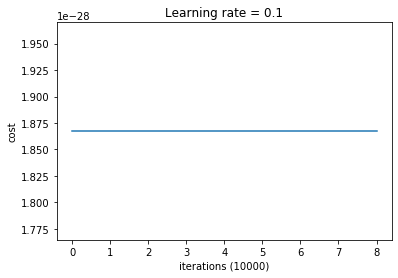

In [11]:
import matplotlib.pyplot as plt 
cost_hist.pop(0)
print("cost_hist_new: \n", cost_hist)
plt.plot(cost_hist)
plt.ylabel('cost')
plt.xlabel('iterations (10000)')
plt.title("Learning rate = 0.1")
plt.show()

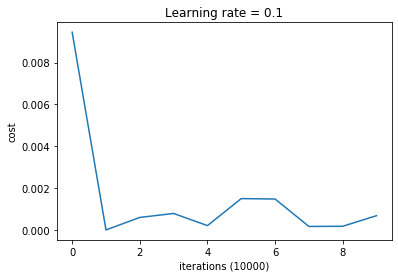

In [12]:
plt.plot(cost_hist1)
plt.ylabel('cost')
plt.xlabel('iterations (10000)')
plt.title("Learning rate = 0.1")
plt.show()

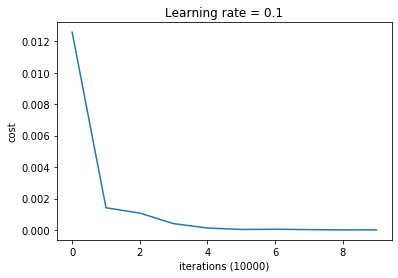

In [13]:
import matplotlib.pyplot as plt 
plt.plot(cost_hist2)
plt.ylabel('cost')
plt.xlabel('iterations (10000)')
plt.title("Learning rate = 0.1")
plt.show()

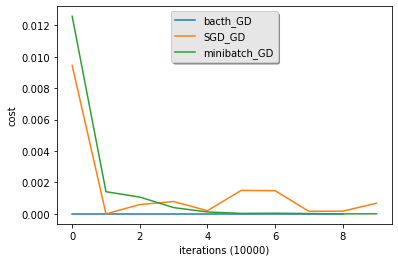

In [16]:
cost_hist3 = {"bacth_GD":cost_hist, 
              "SGD_GD":cost_hist1, 
              "minibatch_GD":cost_hist2}
for i, j in cost_hist3.items():
    plt.plot(j, label =i)
    
plt.ylabel('cost')
plt.xlabel('iterations (10000)')
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()